# Macchine Learning project for water portability

Water quality is important in the health of the people. It has been said the what you eat or drink has a long in determining state of health of an individual

In [1]:
#import python libraries
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost.sklearn import XGBClassifier
#from catboost import CatBoostClassifier

import warnings
warnings.simplefilter("ignore")
%matplotlib inline
#import scikit-learn

In [2]:
# importing the training data for processing
water_data = pd.read_csv('Train.csv')

In [3]:
water_data.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,NaN,261.753637,21174.713291,7.314074,NaN,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


In [4]:
water_data.shape

(2260, 11)

In [5]:
water_data_test = pd.read_csv('Test.csv')

In [6]:
water_data_test.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,region_area_0,NaN,255.664346,20791.623791,6.995401,369.261555,574.413654,10.484783,87.105970,2.963135
1,region_area_10,7.360640,216.294688,32452.919220,7.245890,327.369467,435.488419,15.691810,78.855016,3.662292
2,region_area_1006,7.230845,228.348694,17864.994196,5.513418,344.338446,377.794992,20.017950,59.418053,5.622018
3,region_area_1010,4.797460,241.089018,21280.551369,5.883692,327.539307,367.541193,11.818821,63.978068,4.038503
4,region_area_1011,9.319176,250.107456,14294.545161,7.480130,366.796865,348.546450,15.320293,63.506468,4.129230


In [7]:
water_data_test.shape

(1016, 10)

In [8]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_area_     2260 non-null   object 
 1   ph               1924 non-null   float64
 2   Hardness         2260 non-null   float64
 3   Solids           2260 non-null   float64
 4   Chloramines      2260 non-null   float64
 5   Sulfate          1713 non-null   float64
 6   Conductivity     2260 non-null   float64
 7   Organic_carbon   2260 non-null   float64
 8   Trihalomethanes  2149 non-null   float64
 9   Turbidity        2260 non-null   float64
 10  Potability       2260 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 194.3+ KB


In [9]:
water_data.isnull().sum()

region_area_         0
ph                 336
Hardness             0
Solids               0
Chloramines          0
Sulfate            547
Conductivity         0
Organic_carbon       0
Trihalomethanes    111
Turbidity            0
Potability           0
dtype: int64

In [10]:
# Value count for potability column
water_data['Potability'].value_counts()

0    1382
1     878
Name: Potability, dtype: int64

In [11]:

water_data.fillna('Trihalomethanes').mean()

Hardness            247.000935
Solids            22100.926521
Chloramines           6.802715
Conductivity        436.572437
Organic_carbon       14.359075
Turbidity             3.969176
Potability            0.388496
dtype: float64

In [12]:
water_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1924.0,7.083561,1.596243,0.000000,6.114364,7.060886,8.045673,13.541240
Hardness,2260.0,247.000935,33.162065,124.266124,226.799112,247.379235,267.798367,373.897891
Solids,2260.0,22100.926521,8829.474740,321.247422,15761.393491,21149.453853,27347.271380,61227.500818
Chloramines,2260.0,6.802715,1.592352,0.047189,5.800652,6.828266,7.802569,12.822189
Sulfate,1713.0,334.601013,42.216115,129.745113,307.637713,333.943304,361.159118,481.775755
Conductivity,2260.0,436.572437,80.645313,211.724737,376.894507,432.813965,492.076858,718.331364
Organic_carbon,2260.0,14.359075,3.298100,4.476899,12.154291,14.325645,16.625857,28.405000
Trihalomethanes,2149.0,66.440129,16.321315,0.853000,55.918503,66.727984,77.488813,124.115000
Turbidity,2260.0,3.969176,0.777228,1.450000,3.444178,3.962502,4.502519,6.739000
Potability,2260.0,0.388496,0.487516,0.000000,0.000000,0.000000,1.000000,1.000000


In [13]:
water_data.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1924.000000,7.083561,1.596243,0.000000,6.114364,7.060886,8.045673,13.541240
Hardness,2260.000000,247.000935,33.162065,124.266124,226.799112,247.379235,267.798367,373.897891
Solids,2260.000000,22100.926521,8829.474740,321.247422,15761.393491,21149.453853,27347.271380,61227.500818
Chloramines,2260.000000,6.802715,1.592352,0.047189,5.800652,6.828266,7.802569,12.822189
Sulfate,1713.000000,334.601013,42.216115,129.745113,307.637713,333.943304,361.159118,481.775755
Conductivity,2260.000000,436.572437,80.645313,211.724737,376.894507,432.813965,492.076858,718.331364
Organic_carbon,2260.000000,14.359075,3.298100,4.476899,12.154291,14.325645,16.625857,28.405000
Trihalomethanes,2149.000000,66.440129,16.321315,0.853000,55.918503,66.727984,77.488813,124.115000
Turbidity,2260.000000,3.969176,0.777228,1.450000,3.444178,3.962502,4.502519,6.739000
Potability,2260.000000,0.388496,0.487516,0.000000,0.000000,0.000000,1.000000,1.000000


In [14]:
water_data['ph']

0       3.716080
1       4.270716
2       6.648849
3            NaN
4       9.323584
          ...   
2255    8.347949
2256    6.615982
2257    6.836225
2258    6.385471
2259    6.490037
Name: ph, Length: 2260, dtype: float64

In [15]:
water_data.isnull().sum()

region_area_         0
ph                 336
Hardness             0
Solids               0
Chloramines          0
Sulfate            547
Conductivity         0
Organic_carbon       0
Trihalomethanes    111
Turbidity            0
Potability           0
dtype: int64

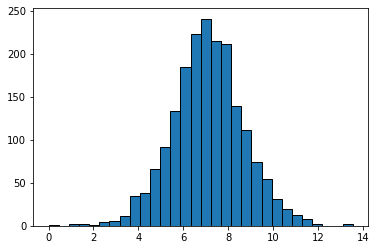

In [16]:
# plotting the various features
plt.hist(water_data['ph'], bins=30, edgecolor='black')
plt.show()

<AxesSubplot:>

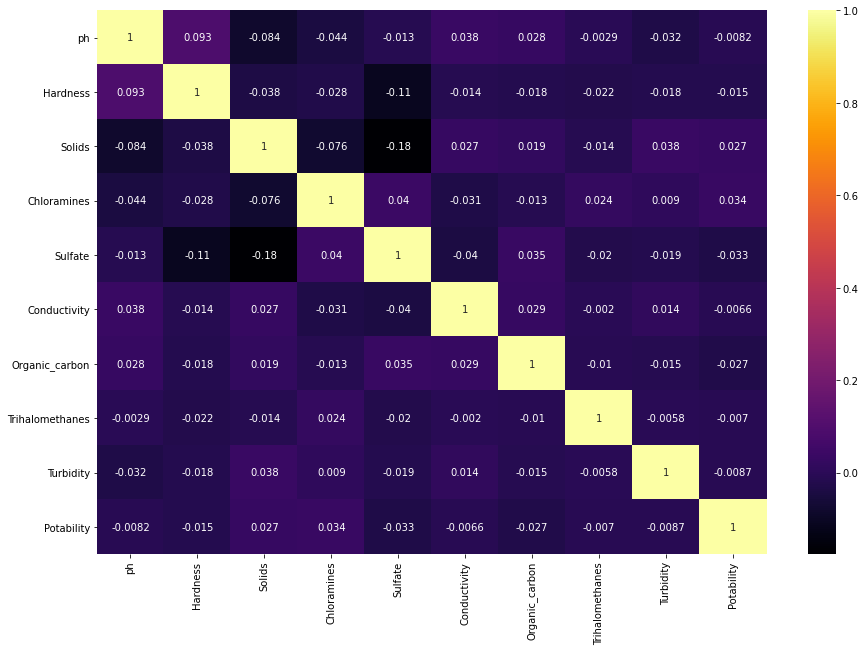

In [17]:
# Correlation matrix for dataset
plt.figure(figsize=(15,10))
sns.heatmap(water_data.corr(), annot=True, cmap="inferno")

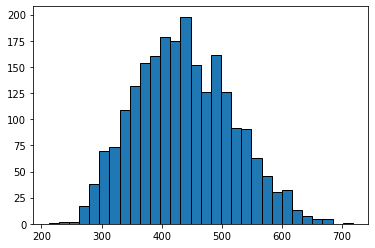

In [19]:
plt.hist(water_data['Conductivity'], bins=30, edgecolor='black')
plt.show()

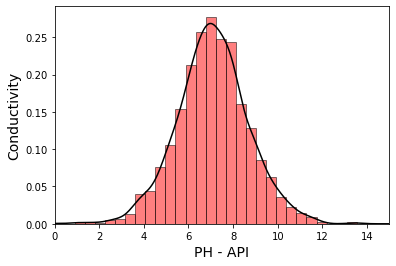

In [20]:
water_data['ph'].plot(kind='hist', bins=30, color='red', alpha=0.5, density=True, edgecolor='black')
water_data['ph'].plot(kind='kde', color='black')
plt.xlabel('PH - API', fontsize=14)
plt.ylabel('Conductivity', fontsize=14)
plt.xlim(0,15)
plt.savefig('PH.png')

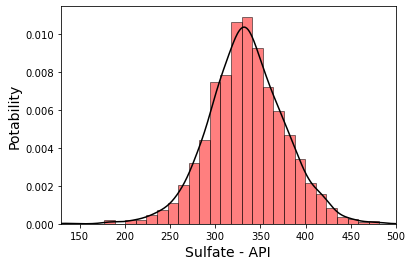

In [21]:
water_data['Sulfate'].plot(kind='hist', bins=30, color='red', alpha=0.5, density=True, edgecolor='black')
water_data['Sulfate'].plot(kind='kde', color='black')
plt.xlabel('Sulfate - API', fontsize=14)
plt.ylabel('Potability', fontsize=14)
plt.xlim(129,500)
plt.savefig('Sulfate.png')

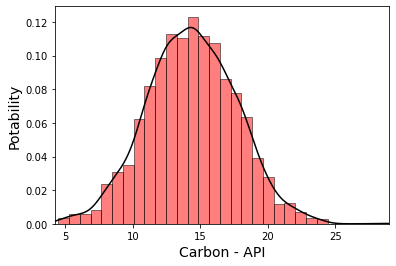

In [22]:
water_data['Organic_carbon'].plot(kind='hist', bins=30, color='red', alpha=0.5, density=True, edgecolor='black')
water_data['Organic_carbon'].plot(kind='kde', color='black')
plt.xlabel('Carbon - API', fontsize=14)
plt.ylabel('Potability', fontsize=14)
plt.xlim(4.2,29)
plt.savefig('Organic_carbon.png')

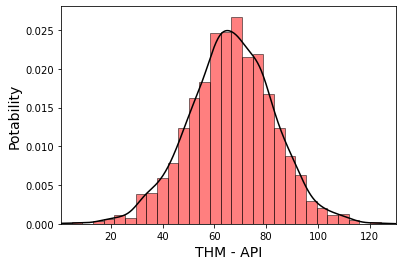

In [23]:
water_data['Trihalomethanes'].plot(kind='hist', bins=30, color='red', alpha=0.5, density=True, edgecolor='black')
water_data['Trihalomethanes'].plot(kind='kde', color='black')
plt.xlabel('THM - API', fontsize=14)
plt.ylabel('Potability', fontsize=14)
plt.xlim(0.8,130)
plt.savefig('Trihalomethanes.png')

In [24]:
mean = water_data['ph'].mean()
p5 = water_data['ph'].quantile(0.05)
p95 = water_data['ph'].quantile(0.95)

print(f'Mean: \t {mean}')
print(f'P05: \t {p5}')
print(f'P95: \t {p95}')

Mean: 	 7.0835605893776865
P05: 	 4.436821342632147
P95: 	 9.775090962566894


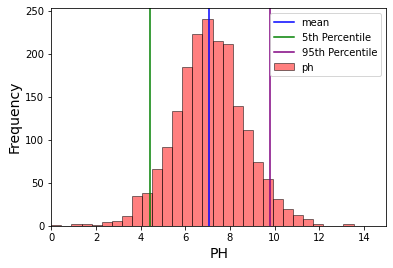

In [25]:
water_data['ph'].plot(kind='hist', bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('PH', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,15)

plt.axvline(mean, color='blue', label='mean')
plt.axvline(p5, color='green', label='5th Percentile')
plt.axvline(p95, color='purple', label='95th Percentile')

plt.legend()
plt.show()

38.85 % of samples are potable (1)


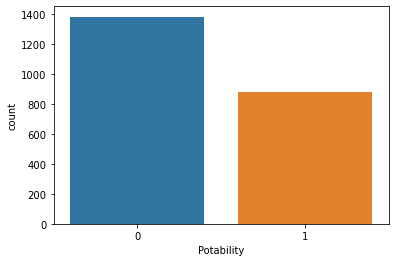

In [26]:
# The plot of the value count of the potability column
sns.countplot(x=water_data["Potability"])


print(f'{water_data.Potability[water_data.Potability==1].count()/water_data.Potability.count()*100:.2f} % of samples are potable (1)')

In [27]:
"""potable = water_data.query('Potability == 0')
not_potable = water_data.query('Potability == 1')

fig = plt.figure(figsize=(20,15))



for ax,column in enumerate(water_data.columns[:9]):
    plt.subplot(3,3,ax+1)
    #plt.title(f'Distribution of {column} values')
    sns.kdeplot(x=potable[column],label='Potable')
    sns.kdeplot(x=not_potable[column],label='Non_Potable')
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()
plt.show()"""

"potable = water_data.query('Potability == 0')\nnot_potable = water_data.query('Potability == 1')\n\nfig = plt.figure(figsize=(20,15))\n\n\n\nfor ax,column in enumerate(water_data.columns[:9]):\n    plt.subplot(3,3,ax+1)\n    #plt.title(f'Distribution of {column} values')\n    sns.kdeplot(x=potable[column],label='Potable')\n    sns.kdeplot(x=not_potable[column],label='Non_Potable')\n    plt.legend(prop=dict(size=10))\n\n    \nplt.tight_layout()\nplt.show()"

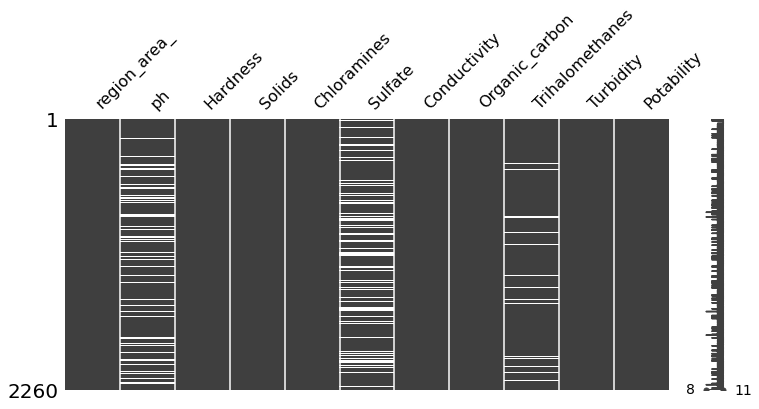

In [28]:
# Using the missigno module to visualize the missing dataset

import missingno as msno
msno.matrix(water_data,figsize=(12,5)) # missing relationship
plt.show()

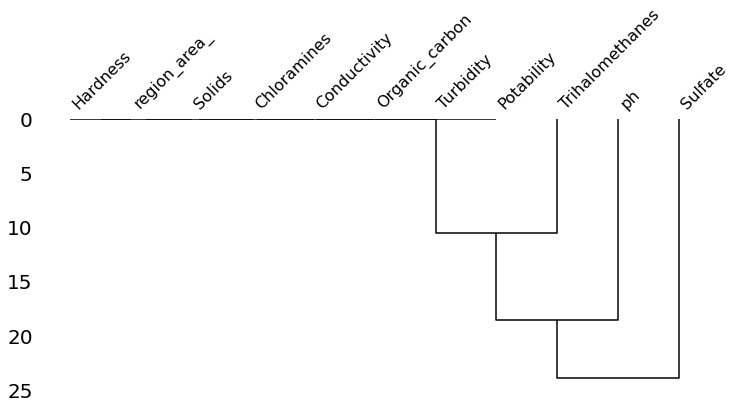

In [29]:
msno.dendrogram(water_data,figsize=(12,5)) # missing relationship step

"""For dataset with 25% of missing values, the column should be dropped dataset"""
plt.show()

In [ ]:
water_data.cov()

In [ ]:
water_data.corr()

# Water dataset Analysis

The water sampling contain both physical and chemical properties. The means of measurement of both parameters are different, so our model is to split the water analysis into chemical and physical and run a machine learning algorithms 

In [31]:
water_data_phy = water_data.drop(['region_area_', 'ph', 'Chloramines', 'Sulfate', 'Organic_carbon', 'Trihalomethanes'], axis = 'columns')

In [32]:
water_data_phy.head()

,Hardness,Solids,Conductivity,Turbidity,Potability
0,180.196811,18630.362669,602.990359,4.500656,0
1,217.611599,24405.555346,359.623910,3.763906,0
2,232.462013,30733.808648,267.809179,4.827527,0
3,261.753637,21174.713291,582.848407,4.217553,0
4,263.484560,15751.480111,409.878704,3.006650,0


In [33]:
water_data_chem = water_data.drop(['region_area_', 'Hardness', 'Solids', 'Conductivity', 'Turbidity'], axis = 'columns')

In [34]:
water_data_chem.head()

,ph,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Potability
0,3.716080,6.330435,NaN,15.285013,56.444076,0
1,4.270716,7.086700,297.951852,13.583526,54.589840,0
2,6.648849,5.656462,344.670335,17.863444,35.411181,0
3,NaN,7.314074,NaN,15.215849,90.367455,0
4,9.323584,5.196259,297.593625,10.727265,74.669285,0


In [35]:
water_data.dropna(subset=['Sulfate'])

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0
5,region_area_1003,4.581969,236.871806,33897.373012,6.053592,317.297905,416.487378,19.804848,62.438303,4.500208,0
6,region_area_1004,7.884842,280.016551,21734.132854,7.598271,315.935097,378.875894,11.740399,49.919322,4.631641,0
...,...,...,...,...,...,...,...,...,...,...,...
2251,region_area_99,9.177870,214.048719,20868.636030,7.421230,321.166545,437.099393,10.319275,62.545926,3.108770,0
2252,region_area_990,5.477283,216.209984,29046.388326,5.218200,371.638198,498.879595,17.370186,80.349797,6.357439,0
2255,region_area_993,8.347949,281.976992,13533.534844,7.318793,314.416241,537.485871,18.768901,58.167866,4.217861,0
2257,region_area_996,6.836225,217.516852,24293.477473,6.556425,333.626695,400.909955,16.111991,87.216925,3.666614,0


In [36]:
water_data = pd.read_csv('train.csv')
water_data = water_data.drop(['Sulfate', 'region_area_'], axis='columns')

In [37]:
#plot(water_data_phy, 'Turbidity')

In [38]:
# To fill in some of the missing data, a mean of the each column

water_data["ph"].fillna(water_data.groupby(["Potability"])["ph"].transform("mean"),inplace=True)
#water_data["Sulfate"].fillna(water_data.groupby(["Potability"])["Sulfate"].transform("mean"),inplace=True)
water_data["Trihalomethanes"].fillna(water_data.groupby(["Potability"])["Trihalomethanes"].transform("mean"),inplace=True)

# Model Training 

I would train and test both physical and chemical properties of water sample in relation to potability 

In [39]:
# Splitting
X = water_data.drop(['Potability'], axis = 1)
y = water_data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=18, stratify=y) #stratify=y

# Balancing data - oversampling minority
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

# Scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
water_data.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,180.196811,18630.362669,6.330435,602.990359,15.285013,56.444076,4.500656,0
1,4.270716,217.611599,24405.555346,7.086700,359.623910,13.583526,54.589840,3.763906,0
2,6.648849,232.462013,30733.808648,5.656462,267.809179,17.863444,35.411181,4.827527,0
3,7.094076,261.753637,21174.713291,7.314074,582.848407,15.215849,90.367455,4.217553,0
4,9.323584,263.484560,15751.480111,5.196259,409.878704,10.727265,74.669285,3.006650,0


In [41]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
         "Naive Bayes": GaussianNB(),
         "ExtraTreesClassifier": ExtraTreesClassifier(),
         "xgb Classifier": XGBClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """ 
    # Set random seed
    
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=5
                                            ).mean()
    return model_scores


In [42]:
import numpy as np

model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

[23:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'Logistic Regression': 0.6017699115044247,
 'KNN': 0.5734513274336284,
 'Random Forest': 0.6619469026548673,
 'Decision Tree': 0.6141592920353982,
 'Naive Bayes': 0.6194690265486725,
 'ExtraTreesClassifier': 0.6300884955752213,
 'xgb Classifier': 0.6584070796460177}

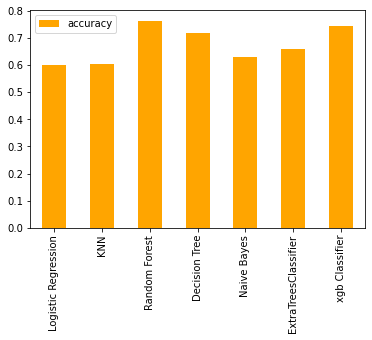

In [49]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="orange");

In [43]:
# Splitting
X = water_data_phy.drop(['Potability'], axis = 1)
y = water_data_phy['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=18, stratify=y) #stratify=y

# Balancing data - oversampling minority
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

# Scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [44]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
         "Naive Bayes": GaussianNB(),
         "ExtraTreesClassifier": ExtraTreesClassifier(),
         "xgb Classifier": XGBClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """ 
    # Set random seed
    
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=5
                                            ).mean()
    return model_scores


In [45]:
import numpy as np

model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

[23:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'Logistic Regression': 0.6176991150442477,
 'KNN': 0.5398230088495575,
 'Random Forest': 0.5858407079646017,
 'Decision Tree': 0.5646017699115043,
 'Naive Bayes': 0.6,
 'ExtraTreesClassifier': 0.5805309734513274,
 'xgb Classifier': 0.5911504424778761}

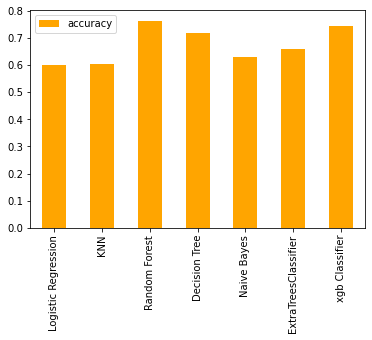

In [50]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="orange");

In [46]:
water_data_chem.head()
water_data_chem["ph"].fillna(water_data_chem.groupby(["Potability"])["ph"].transform("mean"),inplace=True)
water_data_chem["Sulfate"].fillna(water_data_chem.groupby(["Potability"])["Sulfate"].transform("mean"),inplace=True)
water_data_chem["Trihalomethanes"].fillna(water_data_chem.groupby(["Potability"])["Trihalomethanes"].transform("mean"),inplace=True)

In [47]:
# Splitting
X = water_data_chem.drop(['Potability'], axis = 1)
y = water_data_chem['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=18, stratify=y) #stratify=y

# Balancing data - oversampling minority
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

# Scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [48]:
import numpy as np

model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

[23:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'Logistic Regression': 0.6,
 'KNN': 0.6053097345132743,
 'Random Forest': 0.7646017699115044,
 'Decision Tree': 0.7203539823008849,
 'Naive Bayes': 0.631858407079646,
 'ExtraTreesClassifier': 0.6601769911504425,
 'xgb Classifier': 0.7451327433628319}

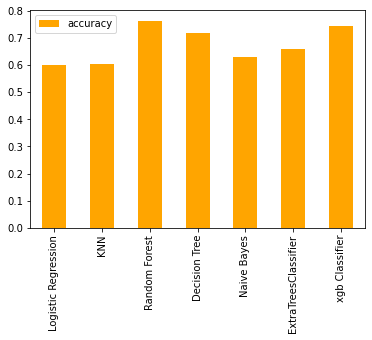

In [51]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="orange");

In [ ]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)


In [52]:
pre
predictions['region_area_'] = water_data_test['region_area_']
predictions.to_csv("submission.csv", index=False)

NameError: name 'predictions' is not defined

In [ ]:
submission = pd.DataFrame({"region_area_": water_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})